<a href="https://colab.research.google.com/github/Zheng7426/machine_learning_practice/blob/master/multiclass_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [18]:
print(len(train_data[0]))
print(train_data.shape)
len(train_data[0])

87
(8982,)


87

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [21]:
print(train_data[0])
print(x_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[0. 1. 1. ... 0. 0. 0.]


In [0]:
from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [24]:
print(test_labels[0])
print(one_hot_test_labels[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data = (x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/15
7982/7982 [==============================] - 2s 272us/step - loss: 2.5781 - accuracy: 0.5436 - val_loss: 1.6674 - val_accuracy: 0.6570
Epoch 2/15
7982/7982 [==============================] - 0s 52us/step - loss: 1.3553 - accuracy: 0.7171 - val_loss: 1.2799 - val_accuracy: 0.7230
Epoch 3/15
7982/7982 [==============================] - 0s 53us/step - loss: 1.0097 - accuracy: 0.7810 - val_loss: 1.1137 - val_accuracy: 0.7580
Epoch 4/15
7982/7982 [==============================] - 0s 53us/step - loss: 0.7959 - accuracy: 0.8304 - val_loss: 1.0354 - val_accuracy: 0.7770
Epoch 5/15
7982/7982 [==============================] - 0s 53us/step - loss: 0.6389 - accuracy: 0.8652 - val_loss: 0.9627 - val_accuracy: 0.7910
Epoch 6/15
7982/7982 [==============================] - 0s 53us/step - loss: 0.5131 - accuracy: 0.8914 - val_loss: 0.9190 - val_accuracy: 0.8050
Epoch 7/15
7982/7982 [==============================] - 0s 53us/step - loss: 0.41

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

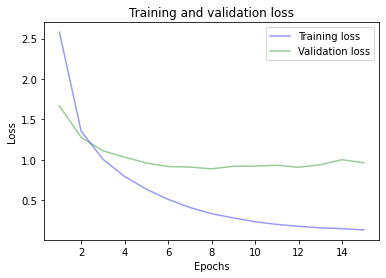

In [29]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', alpha=0.4, label='Training loss')
plt.plot(epochs, val_loss, 'g', alpha=0.4, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

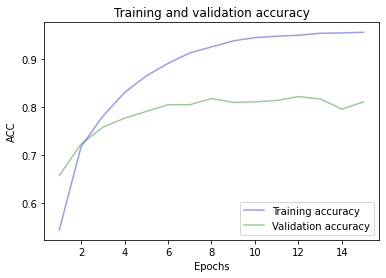

In [31]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'b', alpha=0.4, label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', alpha=0.4, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

In [32]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 93us/step


In [33]:
results

[1.1142054330209272, 0.7920747995376587]

In [0]:
predictions = model.predict(x_test)

In [35]:
predictions[0].shape

(46,)

In [36]:
np.sum(predictions[0])

1.0000001

In [37]:
np.argmax(predictions[0])

3